In [89]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [90]:
print(tf.__version__)

2.3.0


In [91]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-19 15:33:23--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.89MB/s    in 48s     

2020-10-19 15:34:11 (6.48 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [92]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'
train_dir = '/content/output/train'
validation_dir = '/content/output/val'

In [93]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.98):
      print("\nMenghentikan training karena akurasi diatas 0.98!")
      self.model.stop_training = True

callbacks = Callback()

In [94]:
!pip install split-folders
import splitfolders

splitfolders.ratio(base_dir, output="output", seed=1337, ratio=(.6, .4), group_prefix=None)

Copying files: 2188 files [00:01, 2146.30 files/s]


In [95]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [96]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [97]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 128)      

In [98]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [99]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2,
      callbacks=[callbacks])

Epoch 1/20
25/25 - 40s - loss: 1.0981 - accuracy: 0.4062 - val_loss: 0.9697 - val_accuracy: 0.6313
Epoch 2/20
25/25 - 40s - loss: 0.6469 - accuracy: 0.7600 - val_loss: 0.4996 - val_accuracy: 0.8125
Epoch 3/20
25/25 - 40s - loss: 0.3478 - accuracy: 0.8813 - val_loss: 0.2971 - val_accuracy: 0.8813
Epoch 4/20
25/25 - 43s - loss: 0.2257 - accuracy: 0.9325 - val_loss: 0.3000 - val_accuracy: 0.8938
Epoch 5/20
25/25 - 40s - loss: 0.2232 - accuracy: 0.9250 - val_loss: 0.3282 - val_accuracy: 0.9000
Epoch 6/20
25/25 - 40s - loss: 0.1673 - accuracy: 0.9463 - val_loss: 0.1365 - val_accuracy: 0.9500
Epoch 7/20
25/25 - 41s - loss: 0.1238 - accuracy: 0.9575 - val_loss: 0.0951 - val_accuracy: 0.9750
Epoch 8/20
25/25 - 40s - loss: 0.0984 - accuracy: 0.9663 - val_loss: 0.0974 - val_accuracy: 0.9750
Epoch 9/20
25/25 - 40s - loss: 0.1229 - accuracy: 0.9563 - val_loss: 0.0645 - val_accuracy: 0.9750
Epoch 10/20
25/25 - 40s - loss: 0.0853 - accuracy: 0.9688 - val_loss: 0.1395 - val_accuracy: 0.9563
Epoch 11/

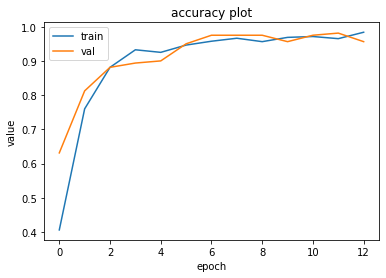

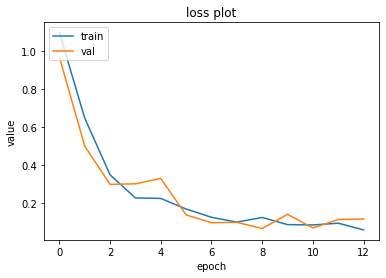

In [100]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy plot')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss plot')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Saving 1MOm36DHK0R8OfIC.png to 1MOm36DHK0R8OfIC.png
1MOm36DHK0R8OfIC.png
rock


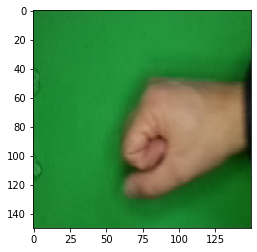

In [103]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]==1:
    print('paper')
  elif classes[0,1]==1:
    print('rock')
  else:
    print('scissors')

Nama : I Putu Tosan Krisna Wiranata

Email : tosankrisna@gmail.com

Domisi asal : Kota Denpasar, Bali